In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from imblearn.combine import SMOTETomek
from collections import Counter
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report,f1_score
from sklearn.model_selection import GridSearchCV,train_test_split


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Nationwide/TRAIN_SET_2023.csv')
data1

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,INPSECTION_FORMAT
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Food Truck,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,Virtual
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,Virtual
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,Virtual
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,Virtual
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0,Virtual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17190,DA0371445,PR0008648,Krispy Kreme Doughnuts #940,"L & L Enterprise Holdings, LLC",Restaurant,7015 W Spring Mountain Rd,Las Vegas,Nevada,89117-3818,9.0,...,"(36.125571, 115.2457)",18.0,28.0,36.0,Non-Major,Non-Major,Non-Major,4,0.0,NaN
17191,DA0371445,PR0008648,Krispy Kreme Doughnuts #940,"L & L Enterprise Holdings, LLC",Restaurant,7015 W Spring Mountain Rd,Las Vegas,Nevada,89117-3818,9.0,...,"(36.125571, 115.2457)",18.0,28.0,36.0,Non-Major,Non-Major,Non-Major,4,0.0,NaN
17192,DA0371445,PR0008648,Krispy Kreme Doughnuts #940,"L & L Enterprise Holdings, LLC",Restaurant,7015 W Spring Mountain Rd,Las Vegas,Nevada,89117-3818,9.0,...,"(36.125571, 115.2457)",18.0,28.0,36.0,Non-Major,Non-Major,Non-Major,4,0.0,NaN
17193,DA0371445,PR0008648,Krispy Kreme Doughnuts #940,"L & L Enterprise Holdings, LLC",Restaurant,7015 W Spring Mountain Rd,Las Vegas,Nevada,89117-3818,9.0,...,"(36.125571, 115.2457)",18.0,28.0,36.0,Non-Major,Non-Major,Non-Major,4,0.0,NaN


In [ ]:
data1=data1.drop_duplicates()
data1

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,INPSECTION_FORMAT
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Food Truck,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,Virtual
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,Virtual
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,Virtual
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,Virtual
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0,Virtual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,DA0127918,PR0002834,BALLYS SEASONS GOURMET ROOM,BALLYS GRAND HOTEL,Restaurant,3645 S Las Vegas Blvd,Las Vegas,Nevada,89114,1.0,...,"(36.1143212, 115.1708662)",2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,NaN
15669,DA0895752,PR0017832,Cicis Pizza #725,Cicis Pizza #725,Restaurant,2235 E Cheyenne Ave 200,North Las Vegas,Nevada,89030-8422,6.0,...,"(36.2165221, 115.1189671)",213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,NaN
15670,DA1074894,PR0000125,WENDYS #32,WENDYS #32 @ FASHION SHOW,Restaurant,3200 S Las Vegas Blvd #3060,Las Vegas,Nevada,89109-2612,9.0,...,"(36.1282071, 115.1730081)",209.0,213.0,217.0,Critical,Major,Major,5,0.0,NaN
15671,DA1000307,PR0014816,Lighthouse Food Truck,"So Motel Management, LLC",Food Truck,110 Ville Dr,Boulder City,Nevada,89005-1401,3.0,...,"(35.9915189, 114.830906)",214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,NaN


In [ ]:
data1.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                  object
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

In [ ]:
data1.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'INPSECTION_FORMAT'],
      dtype='object')

In [ ]:
cols=['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION','ZIP']

In [ ]:
data1=data1.drop(columns=cols,axis=1).copy()
data1

,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,...,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,INPSECTION_FORMAT
0,Food Truck,201 E Sands Ave,Las Vegas,Nevada,0.0,C,25.0,27.95998269,13.004886,11/5/2013 16:15,...,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,Virtual
1,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,3.0,A,7.0,27.71936533,3.922086,9/21/2012 13:00,...,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,Virtual
2,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,8.0,A,23.0,26.44263674,10.312777,9/16/2011 11:50,...,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,Virtual
3,Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,0.0,A,14.0,33.98829267,4.163975,11/22/2011 11:40,...,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,Virtual
4,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,0.0,A,10.0,21.98028217,13.462786,11/9/2012 20:30,...,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0,Virtual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,3645 S Las Vegas Blvd,Las Vegas,Nevada,1.0,A,24.0,27.26549379,1.858442,2/23/2010 16:20,...,"(36.1143212, 115.1708662)",2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,NaN
15669,Restaurant,2235 E Cheyenne Ave 200,North Las Vegas,Nevada,6.0,A,21.0,18.21654939,6.797710,11/3/2011 11:10,...,"(36.2165221, 115.1189671)",213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,NaN
15670,Restaurant,3200 S Las Vegas Blvd #3060,Las Vegas,Nevada,9.0,A,6.0,32.33471149,2.341416,5/28/2013 12:50,...,"(36.1282071, 115.1730081)",209.0,213.0,217.0,Critical,Major,Major,5,0.0,NaN
15671,Food Truck,110 Ville Dr,Boulder City,Nevada,3.0,C,11.0,36.0767051,1.278035,7/26/2012 8:00,...,"(35.9915189, 114.830906)",214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,NaN


In [ ]:
(data1.isnull().sum()/17195 )*100.0

RESTAURANT_CATEGORY                  0.756034
ADDRESS                              0.407095
CITY                                 1.372492
STATE                                1.215470
CURRENT_DEMERITS                     1.256179
CURRENT_GRADE                        1.634196
EMPLOYEE_COUNT                       0.540855
MEDIAN_EMPLOYEE_AGE                  0.197732
MEDIAN_EMPLOYEE_TENURE               1.727246
INSPECTION_TIME                      1.064263
INSPECTION_TYPE                      1.285257
INSPECTION_DEMERITS                  1.477174
VIOLATIONS_RAW                       0.959581
RECORD_UPDATED                       0.692062
LAT_LONG_RAW                         0.087235
FIRST_VIOLATION                      1.232917
SECOND_VIOLATION                     0.494330
THIRD_VIOLATION                      0.354754
FIRST_VIOLATION_TYPE                 0.849084
SECOND_VIOLATION_TYPE                1.552777
THIRD_VIOLATION_TYPE                 1.006106
NUMBER_OF_VIOLATIONS              

In [ ]:
data1.isnull().sum()

RESTAURANT_CATEGORY                  130
ADDRESS                               70
CITY                                 236
STATE                                209
CURRENT_DEMERITS                     216
CURRENT_GRADE                        281
EMPLOYEE_COUNT                        93
MEDIAN_EMPLOYEE_AGE                   34
MEDIAN_EMPLOYEE_TENURE               297
INSPECTION_TIME                      183
INSPECTION_TYPE                      221
INSPECTION_DEMERITS                  254
VIOLATIONS_RAW                       165
RECORD_UPDATED                       119
LAT_LONG_RAW                          15
FIRST_VIOLATION                      212
SECOND_VIOLATION                      85
THIRD_VIOLATION                       61
FIRST_VIOLATION_TYPE                 146
SECOND_VIOLATION_TYPE                267
THIRD_VIOLATION_TYPE                 173
NUMBER_OF_VIOLATIONS                 169
NEXT_INSPECTION_GRADE_C_OR_BELOW      38
INPSECTION_FORMAT                   9398
dtype: int64

In [ ]:
null_percentages = (data1.isna().mean() * 100).round(2)
null_percentages = null_percentages[null_percentages > 0]
null_percentages = null_percentages.sort_values(ascending=False)

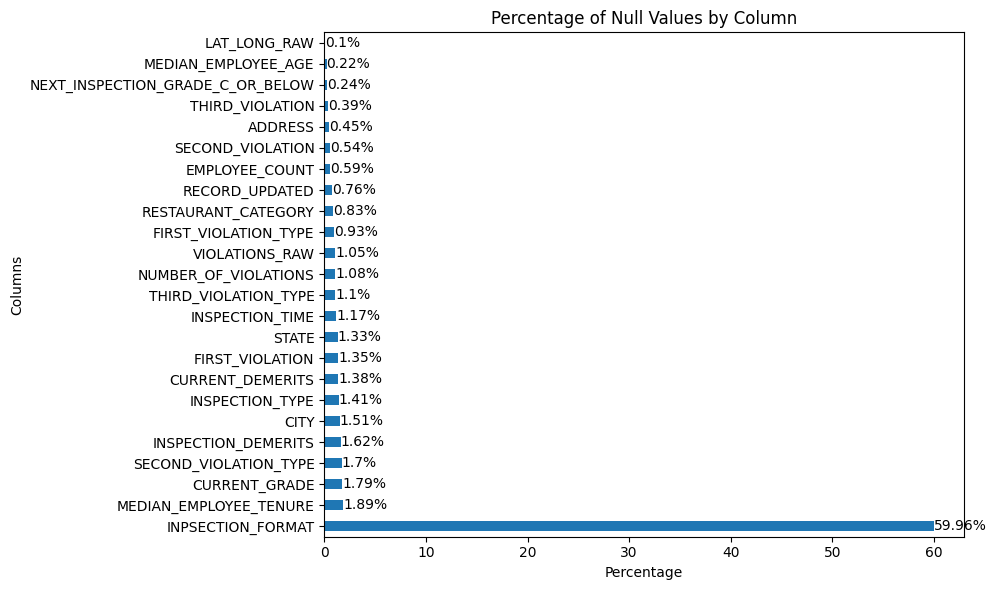

In [ ]:
plt.figure(figsize=(10, 6))
ax=null_percentages.plot(kind='barh')
plt.title('Percentage of Null Values by Column')
plt.xlabel('Percentage')
plt.ylabel('Columns')

for i, v in enumerate(null_percentages):
    plt.text(v, i, f'{v}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()

Before applyting any sort of preprocessing on data, just want to conduct Hypothesis to understand the impact of feature on target vairable.
Because if I apply pd.dropna(), I lose 20% of data.



I ran a two-sided Kruskal Wallis test. Given our
group standard deviations were not equal, I decided it was not appropriate to use an ANOVA.


*Does* INSPECTION_TYPE effects the NEXT_INSPECTION_GRADE_C_OR_BELOW ?




% of missing data dropped from 20 to 13

by removing below irrelevant columns

In [ ]:
data2=data1.drop(columns=['INPSECTION_FORMAT','ADDRESS','CITY','STATE','INSPECTION_TIME','INSPECTION_TYPE','VIOLATIONS_RAW','RECORD_UPDATED','LAT_LONG_RAW'],axis=1).copy()
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Truck,0.0,C,25.0,27.95998269,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0
1,Restaurant,3.0,A,7.0,27.71936533,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0
2,Restaurant,8.0,A,23.0,26.44263674,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0
3,Elementary School Kitchen,0.0,A,14.0,33.98829267,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0
4,Bar / Tavern,0.0,A,10.0,21.98028217,13.462786,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.26549379,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0
15669,Restaurant,6.0,A,21.0,18.21654939,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0
15670,Restaurant,9.0,A,6.0,32.33471149,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0
15671,Food Truck,3.0,C,11.0,36.0767051,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0


In [ ]:
data2=data2.dropna().copy()

In [ ]:
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Truck,0.0,C,25.0,27.95998269,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0
1,Restaurant,3.0,A,7.0,27.71936533,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0
2,Restaurant,8.0,A,23.0,26.44263674,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0
3,Elementary School Kitchen,0.0,A,14.0,33.98829267,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0
5,Bar / Tavern,3.0,A,43.0,25.94720622,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.26549379,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0
15669,Restaurant,6.0,A,21.0,18.21654939,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0
15670,Restaurant,9.0,A,6.0,32.33471149,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0
15671,Food Truck,3.0,C,11.0,36.0767051,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0


In [ ]:
data2.groupby(by='NEXT_INSPECTION_GRADE_C_OR_BELOW').count().iloc[::,:1].reset_index()

,NEXT_INSPECTION_GRADE_C_OR_BELOW,RESTAURANT_CATEGORY
0,-3.0,1
1,0.0,11080
2,1.0,2294
3,3.0,1
4,4.0,1
5,7.0,1
6,9.0,1


# Cleaning the data

In [ ]:
data2=data2[data2['NEXT_INSPECTION_GRADE_C_OR_BELOW']>=0].copy()
data2=data2[data2['NEXT_INSPECTION_GRADE_C_OR_BELOW']<=1].copy()
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Truck,0.0,C,25.0,27.95998269,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0
1,Restaurant,3.0,A,7.0,27.71936533,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0
2,Restaurant,8.0,A,23.0,26.44263674,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0
3,Elementary School Kitchen,0.0,A,14.0,33.98829267,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0
5,Bar / Tavern,3.0,A,43.0,25.94720622,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.26549379,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0
15669,Restaurant,6.0,A,21.0,18.21654939,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0
15670,Restaurant,9.0,A,6.0,32.33471149,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0
15671,Food Truck,3.0,C,11.0,36.0767051,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0


In [ ]:
data2.dtypes

RESTAURANT_CATEGORY                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                  object
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_DEMERITS                  object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                     float64
FIRST_VIOLATION_TYPE                 object
SECOND_VIOLATION_TYPE                object
THIRD_VIOLATION_TYPE                 object
NUMBER_OF_VIOLATIONS                 object
NEXT_INSPECTION_GRADE_C_OR_BELOW    float64
dtype: object

Employee Count
and also show the box plot for this to give valid reason




In [ ]:
data2=data2[data2['EMPLOYEE_COUNT']>=0].copy()


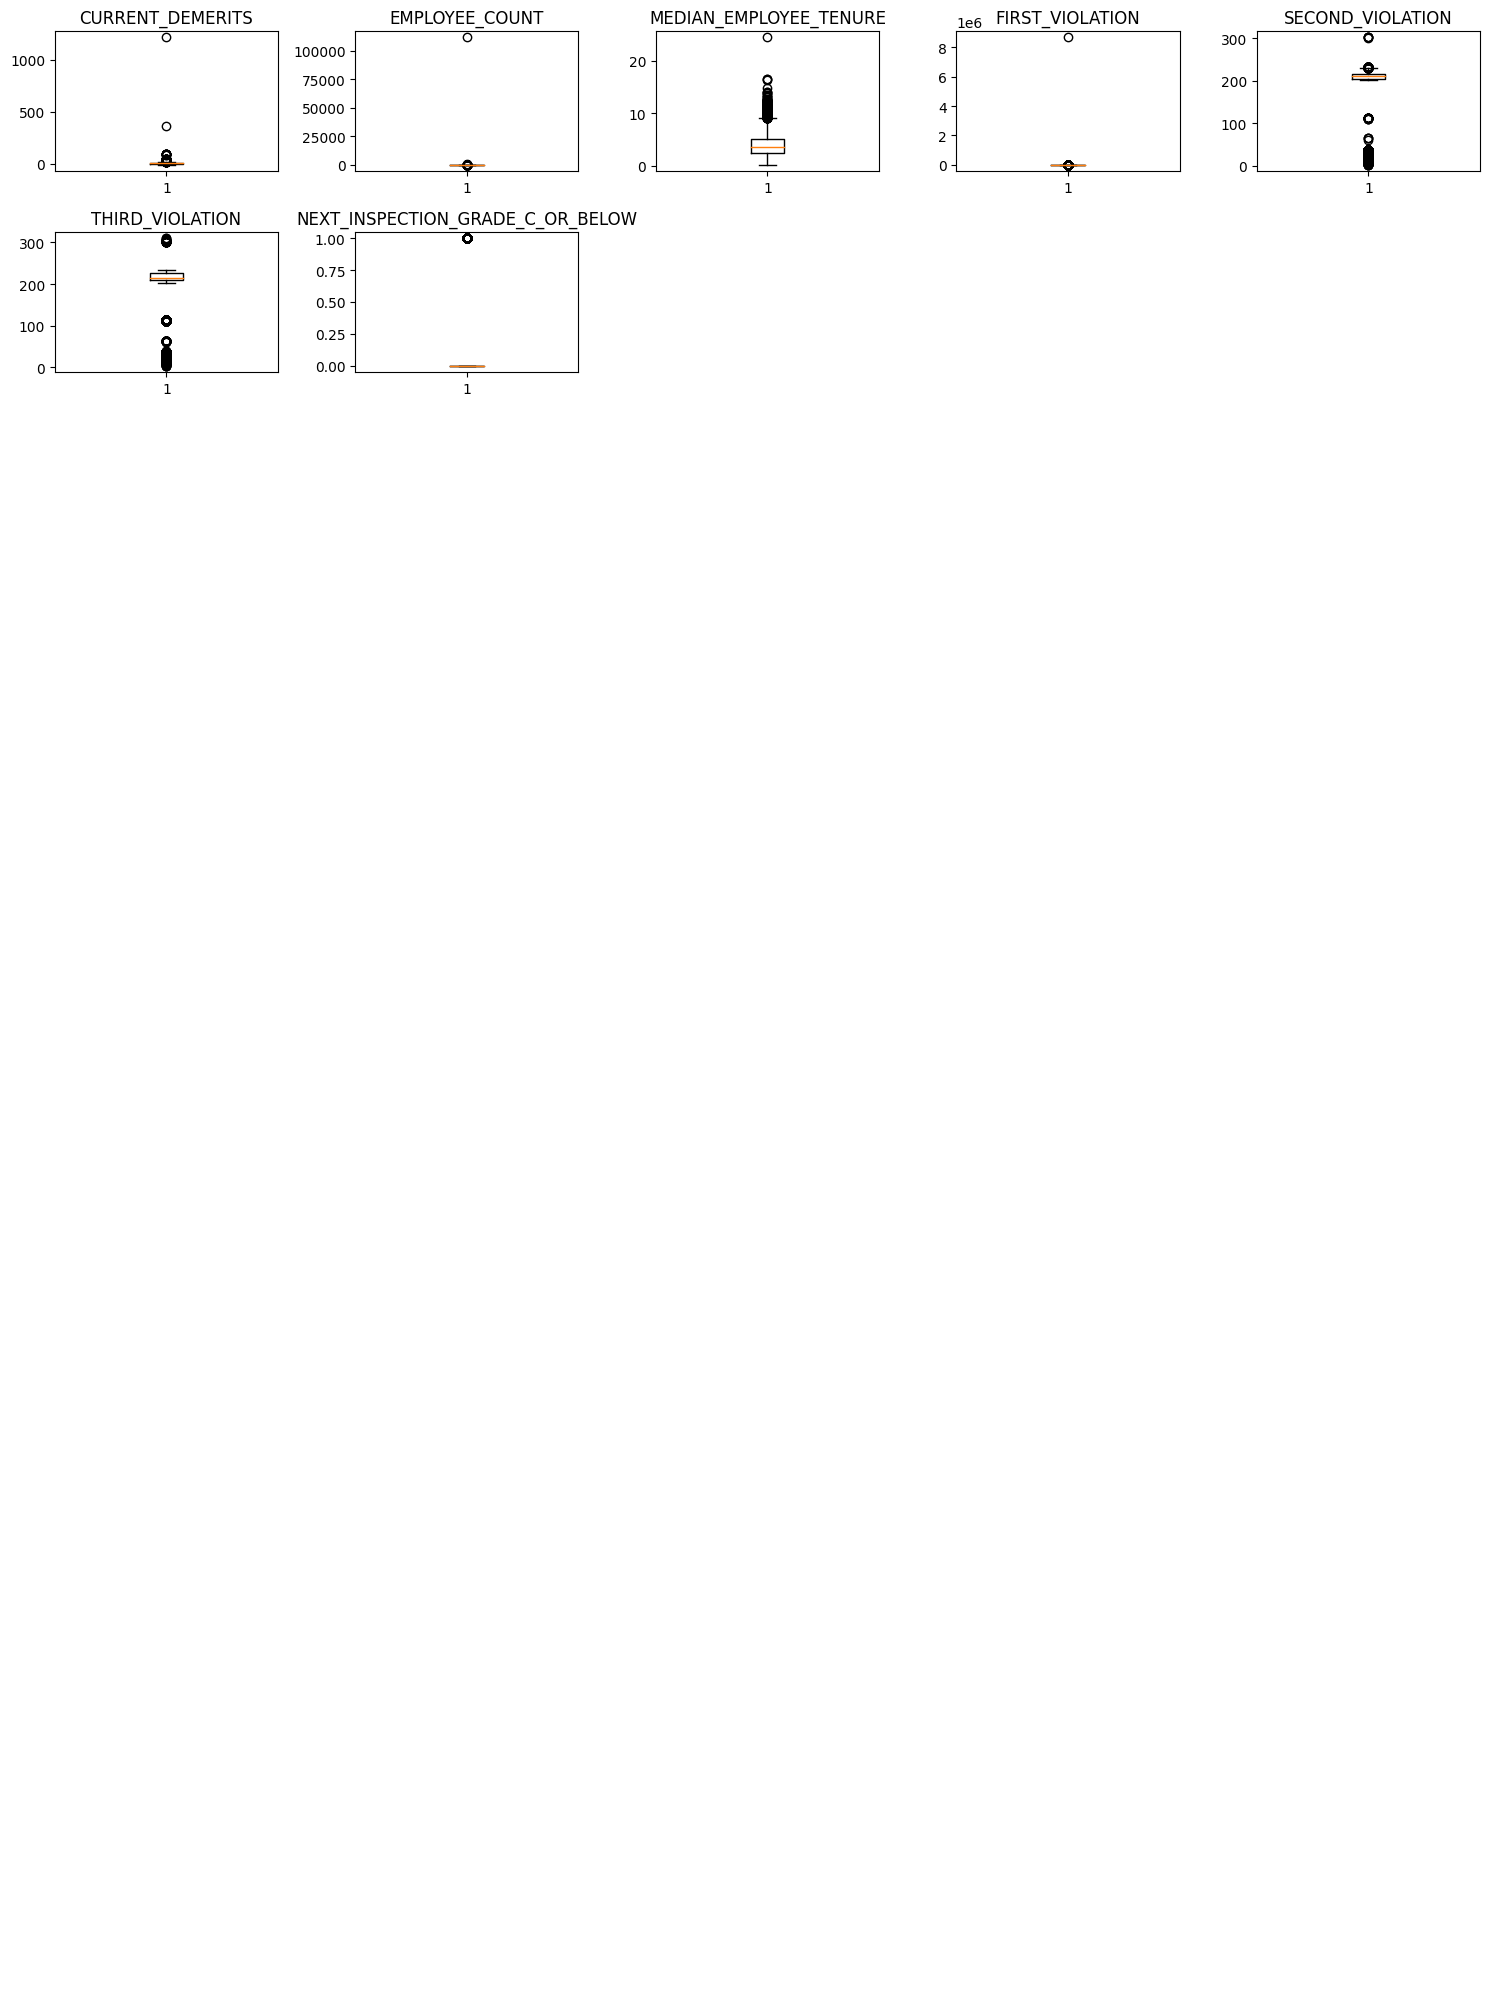

In [ ]:
numeric_cols = data2.columns[data2.dtypes != object]
fig, axes = plt.subplots(10, 5, figsize=(15, 20))
axes = axes.flatten()
# Creating boxplot
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(data2[column])
    axes[i].set_title(column)

# Removing the unused plots
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()


In [ ]:
print(min(data2['MEDIAN_EMPLOYEE_AGE']))
print(max(data2['MEDIAN_EMPLOYEE_AGE']))

-3.146213467
Pancakes


In [ ]:
def custom_convert(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value

data2['MEDIAN_EMPLOYEE_AGE'] = data2['MEDIAN_EMPLOYEE_AGE'].apply(custom_convert)



In [ ]:
data2['MEDIAN_EMPLOYEE_AGE'] = pd.to_numeric(data2['MEDIAN_EMPLOYEE_AGE'], errors='coerce')

# Filter the DataFrame to retain rows where 'Value_Column' contains float values
data2 = data2.dropna(subset=['MEDIAN_EMPLOYEE_AGE']).copy()

In [ ]:
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0


In [ ]:
data2['MEDIAN_EMPLOYEE_AGE']

0        27.959983
1        27.719365
2        26.442637
3        33.988293
5        25.947206
           ...    
15668    27.265494
15669    18.216549
15670    32.334711
15671    36.076705
15672    25.997975
Name: MEDIAN_EMPLOYEE_AGE, Length: 13370, dtype: float64

In [ ]:
data2=data2[data2['MEDIAN_EMPLOYEE_AGE']>0].copy()

In [ ]:
min(data2['MEDIAN_EMPLOYEE_AGE'])

14.0

In [ ]:
wrong_age=data2[data2['MEDIAN_EMPLOYEE_AGE']>70]

In [ ]:
wrong_age

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
291,Restaurant,8.0,A,3.0,8.675309e+02,4.369420,17,209.0,212.0,213.0,Critical,Major,Major,6,0.0
726,Restaurant,6.0,A,3.0,4.120000e+16,0.866934,7,213.0,214.0,229.0,Major,Major,Non-Major,3,0.0


In [ ]:
data2=data2[data2['MEDIAN_EMPLOYEE_AGE']<70].copy()
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0


In [ ]:
age_bins = [0, 30, 40, 50,60]
age_labels = ['0-30', '31-40', '41-50', '51-60']
data2['Age_Bucket'] = pd.cut(data2['MEDIAN_EMPLOYEE_AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

In [ ]:
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9a6f10f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9a6f11450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9a6f10c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9a6f119c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9a6f11c60>],
 'means': []}

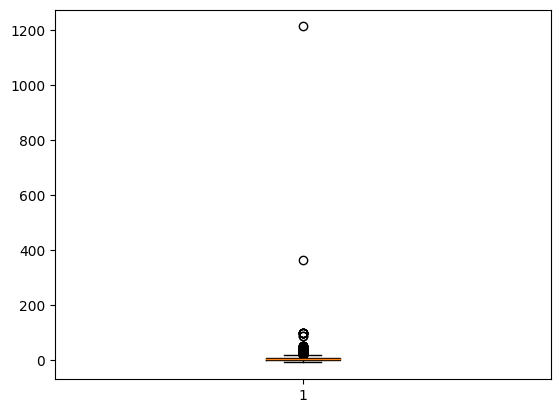

In [ ]:
plt.boxplot(data2['CURRENT_DEMERITS'])

In [ ]:
demerit_bins = [0, 30, 40, 50,60,float('inf')]
demerit_labels = ['0-30', '31-40', '41-50', '51-60','70+']
data2['Demerit_Bucket'] = pd.cut(data2['CURRENT_DEMERITS'], bins=demerit_bins, labels=demerit_labels, include_lowest=True)

In [ ]:
Demerit_count=data2.groupby(by='Demerit_Bucket').count().reset_index().iloc[::,:2].copy()
Demerit_count=Demerit_count.rename(columns={'RESTAURANT_CATEGORY':'Count'}).copy()
Demerit_count

,Demerit_Bucket,Count
0,0-30,13298
1,31-40,31
2,41-50,19
3,51-60,6
4,70+,12


In [ ]:
data2=data2[data2['CURRENT_DEMERITS']<=50].copy()
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30


In [ ]:
grade_wisecount=data2.groupby(['CURRENT_GRADE']).count().reset_index().iloc[::,:2].copy()
grade_wisecount=grade_wisecount.rename(columns={'RESTAURANT_CATEGORY':'Count'}).copy()
grade_wisecount

,CURRENT_GRADE,Count
0,.\<><1@#&|,1
1,7,1
2,A,11765
3,A+,1
4,AA,1
5,AAA,1
6,Ayyyyyyy,1
7,B,212
8,C,1271
9,C+,1


In [ ]:
category_mapping = {
    'A': 'A',
    'A+': 'A',
    'AA': 'A',
    'AAA': 'A',
    'Ayyyyyyy':'A',
    'B': 'B',
    'C': 'C',
    'C+': 'C',
    'CC': 'C',
    'Cc': 'C'
}
categories_to_keep = ['A', 'B', 'C']

In [ ]:
data2['CURRENT_GRADE'] = data2['CURRENT_GRADE'].replace(category_mapping)

In [ ]:
data2 = data2[data2['CURRENT_GRADE'].isin(categories_to_keep)].copy()

In [ ]:
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30


In [ ]:
data2['INSPECTION_DEMERITS'] = data2['INSPECTION_DEMERITS'].apply(custom_convert)
data2['INSPECTION_DEMERITS'] = pd.to_numeric(data2['INSPECTION_DEMERITS'], errors='coerce')

# Filter the DataFrame to retain rows where 'Value_Column' contains float values
data2 = data2.dropna(subset=['INSPECTION_DEMERITS']).copy()
data2=data2[data2['INSPECTION_DEMERITS']>0].copy()

In [ ]:
data2['INSPECTION_DEMERITS']
#print(max(data2['INSPECTION_DEMERITS']))

0        11.0
1         9.0
2         9.0
3         5.0
5        17.0
         ... 
15668    10.0
15669     7.0
15670    17.0
15671     7.0
15672     5.0
Name: INSPECTION_DEMERITS, Length: 13243, dtype: float64

In [ ]:
IN_demerit_bins = [0, 30, 40, 50,60,float('inf')]
IN_demerit_labels = ['0-30', '31-40', '41-50', '51-60','70+']
data2['INSPECTION_DEMERITS_bucket'] = pd.cut(data2['INSPECTION_DEMERITS'], bins=IN_demerit_bins, labels=IN_demerit_labels, include_lowest=True)

In [ ]:
IN_Demerit_count=data2.groupby(by='INSPECTION_DEMERITS_bucket').count().reset_index().iloc[::,:2]
IN_Demerit_count

,INSPECTION_DEMERITS_bucket,RESTAURANT_CATEGORY
0,0-30,12540
1,31-40,610
2,41-50,65
3,51-60,21
4,70+,7


In [ ]:
data2=data2[data2['INSPECTION_DEMERITS']<=50].copy()
data2

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30,0-30
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
data2['RESTAURANT_CATEGORY'].unique()

array(['Food Truck', 'Restaurant', 'Elementary School Kitchen',
       'Bar / Tavern', 'Pantry', 'Special Kitchen', 'Bakery Sales',
       'Food Trucks / Mobile Vendor', 'Buffet', 'Portable Unit',
       'Concessions', 'Kitchen Bakery', 'Produce Market', 'Bar / TaVen',
       'Grocery Store Sampling', 'Banquet Support', 'Caterer',
       'Bark / Tavern', 'Banquet Kitchen', 'Meat/Poultry/Seafood',
       'Garde Manger', 'Portable Bar', 'Institutional Food Service',
       'Gas Station', 'Vegetable Prep', 'Childcare Kitchens',
       'Confection', 'Main Kitchen', 'Barbeque', 'Farmers Market',
       'Self-Service Food Truck', 'Beer Bar', 'Jimmy Buffett'],
      dtype=object)

In [ ]:
data3=data2.copy()
data3

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Truck,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30,0-30
1,Restaurant,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Restaurant,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Elementary School Kitchen,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Bar / Tavern,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Restaurant,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Restaurant,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Truck,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
category_mapping1 = {
    'Food Truck': 'Food Service Establishments',
    'Restaurant': 'Food Service Establishments',
    'Bar / Tavern': 'Food Service Establishments',
    'Bar / TaVen': 'Food Service Establishments',
    'Bark / Tavern':'Food Service Establishments',
    'Pantry': 'Food Service Establishments',
    'Special Kitchen': 'Food Service Establishments',
    'Bakery Sales': 'Food Service Establishments',
    'Buffet': 'Food Service Establishments',
    'Concessions': 'Food Service Establishments',
    'Kitchen Bakery':'Food Service Establishments',
    'Produce Market':'Food Service Establishments',
    'Banquet Support':'Food Service Establishments',
    'Caterer':'Food Service Establishments',
    'Banquet Kitchen':'Food Service Establishments',
    'Food Trucks / Mobile Vendor':'Food Service Establishments',
    'Confection':'Food Service Establishments',
    'Main Kitchen':'Food Service Establishments',
    'Barbeque':'Food Service Establishments',
    'Childcare Kitchens':'Food Service Establishments',
    'Farmers Market':'Food Service Establishments',
    'Self-Service Food Truck':'Food Service Establishments',

    'Grocery Store Sampling':'Retail Food Outlets',
    'Gas Station':'Retail Food Outlets',

    'Elementary School Kitchen':'Food Preparation and Cooking',
    'Meat/Poultry/Seafood':'Food Preparation and Cooking',
    'Garde Manger':'Food Preparation and Cooking',
    'Vegetable Prep':'Food Preparation and Cooking',

    'Portable Unit':'Beverage and Bar Service',
    'Portable Bar':'Beverage and Bar Service',
    'Institutional Food Service':'Beverage and Bar Service',
    'Jimmy Buffett':'Beverage and Bar Service',
    'Beer Bar':'Beverage and Bar Service'

}


In [ ]:
data3['RESTAURANT_CATEGORY'] = data3['RESTAURANT_CATEGORY'].replace(category_mapping1)

In [ ]:
data3['RESTAURANT_CATEGORY'].unique()

array(['Food Service Establishments', 'Food Preparation and Cooking',
       'Beverage and Bar Service', 'Retail Food Outlets'], dtype=object)

In [ ]:
data3

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Service Establishments,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30,0-30
1,Food Service Establishments,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Food Service Establishments,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Food Preparation and Cooking,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Food Service Establishments,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Food Service Establishments,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Food Service Establishments,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Service Establishments,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
rest_grade=pd.DataFrame(data3.groupby(by='RESTAURANT_CATEGORY')['NEXT_INSPECTION_GRADE_C_OR_BELOW'].sum()).reset_index()
rest_grade

,RESTAURANT_CATEGORY,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Beverage and Bar Service,42.0
1,Food Preparation and Cooking,28.0
2,Food Service Establishments,2164.0
3,Retail Food Outlets,10.0


<Axes: ylabel='RESTAURANT_CATEGORY'>

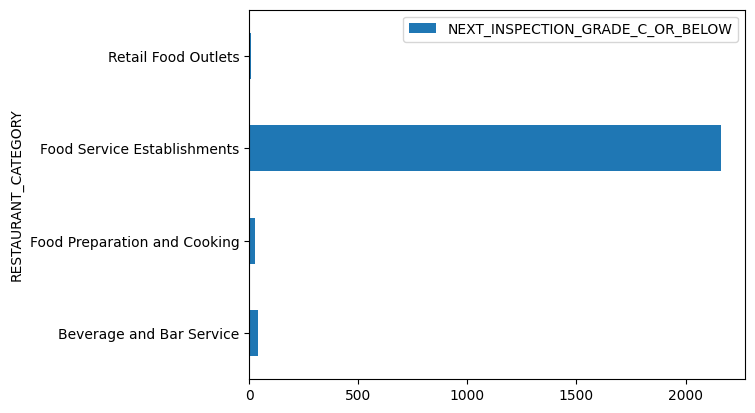

In [ ]:
rest_grade.plot.barh('RESTAURANT_CATEGORY',rot=0)

In [ ]:
data3.groupby('FIRST_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,FIRST_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,Critical,6070
1,Kritical,10
2,Major,5768
3,Major-ish,1
4,Non-Major,1355
5,Not Critical Enough,3
6,Not Sure,1
7,Supercalifragilisticexpialidocius,7


In [ ]:
category_mapping2 = {
    'Critical': 'Critical',
    'Kritical': 'Critical',
    'Major': 'Major',
    'Non-Major': 'Non-Major'
}
categories_to_keep2 = ['Critical', 'Major', 'Non-Major']

In [ ]:
data3['FIRST_VIOLATION_TYPE'] = data3['FIRST_VIOLATION_TYPE'].replace(category_mapping2)

In [ ]:
data3 = data3[data3['FIRST_VIOLATION_TYPE'].isin(categories_to_keep2)].copy()
data3

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Service Establishments,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0.0,0-30,0-30,0-30
1,Food Service Establishments,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Food Service Establishments,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Food Preparation and Cooking,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Food Service Establishments,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Food Service Establishments,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Food Service Establishments,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Service Establishments,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
data3.groupby('FIRST_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,FIRST_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,Critical,6080
1,Major,5768
2,Non-Major,1355


In [ ]:
data3.groupby('SECOND_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,SECOND_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,Critical,2529
1,I have no idea,1
2,Imminent Health Hazard,2
3,Kitchen Nightmares,1
4,Kritical,4
5,Major,6773
6,Non-Major,3892
7,Supercritical,1


In [ ]:
data3['SECOND_VIOLATION_TYPE'] = data3['SECOND_VIOLATION_TYPE'].replace(category_mapping2)

In [ ]:
data3 = data3[data3['SECOND_VIOLATION_TYPE'].isin(categories_to_keep2)].copy()


In [ ]:
data3.groupby('SECOND_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,SECOND_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,Critical,2533
1,Major,6773
2,Non-Major,3892


In [ ]:
data3.groupby('THIRD_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,THIRD_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,789wre,1
1,Banana,1
2,Critical,711
3,Down Yonder,1
4,Imminent Health Hazard,31
5,Kritical,2
6,Major,6202
7,Non-MaJoRNonMajorNonmajor,7
8,Non-Major,6236
9,Whoa,6


In [ ]:
category_mapping3 = {
    'Critical': 'Critical',
    'Kritical': 'Critical',
    'Imminent Health Hazard':'Critical',
    'Major': 'Major',
    'Non-Major': 'Non-Major'
}
categories_to_keep3 = ['Critical', 'Major', 'Non-Major']

In [ ]:
data3['THIRD_VIOLATION_TYPE'] = data3['THIRD_VIOLATION_TYPE'].replace(category_mapping3)
data3 = data3[data3['THIRD_VIOLATION_TYPE'].isin(categories_to_keep3)].copy()
data3

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Service Establishments,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Critical,4,0.0,0-30,0-30,0-30
1,Food Service Establishments,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Food Service Establishments,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Food Preparation and Cooking,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Food Service Establishments,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Food Service Establishments,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Food Service Establishments,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Service Establishments,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
data3.groupby('THIRD_VIOLATION_TYPE').count().iloc[::,:1].reset_index()

,THIRD_VIOLATION_TYPE,RESTAURANT_CATEGORY
0,Critical,744
1,Major,6202
2,Non-Major,6236


In [ ]:
data3['NUMBER_OF_VIOLATIONS']=pd.to_numeric(data3['NUMBER_OF_VIOLATIONS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9a7a23760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9a7aa4fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9a7a0f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9a7aa54e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9a7aa5780>],
 'means': []}

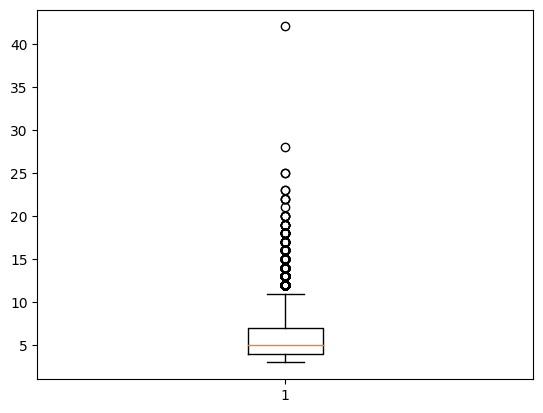

In [ ]:
plt.boxplot(data3['NUMBER_OF_VIOLATIONS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9a7920e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9a7921360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9a7920b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9a79218a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9a7921b40>],
 'means': []}

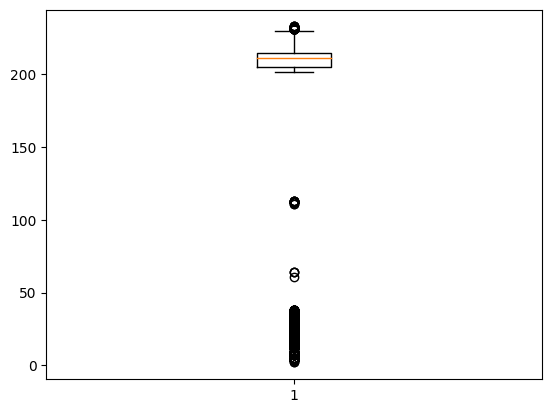

In [ ]:
plt.boxplot(data3['SECOND_VIOLATION'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9a7977190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9a7aa6500>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9a7976ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9a7977550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9a79777f0>],
 'means': []}

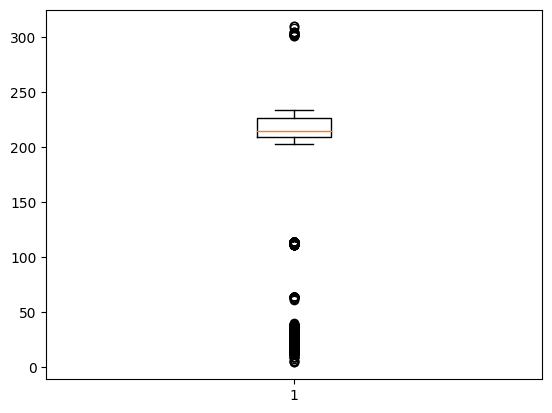

In [ ]:
plt.boxplot(data3['THIRD_VIOLATION'])

#Plotting

In [ ]:
data4=data3.copy()
data4

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket,INSPECTION_DEMERITS_bucket
0,Food Service Establishments,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Critical,4,0.0,0-30,0-30,0-30
1,Food Service Establishments,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30,0-30
2,Food Service Establishments,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30,0-30
3,Food Preparation and Cooking,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30,0-30
5,Food Service Establishments,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15669,Food Service Establishments,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30,0-30
15670,Food Service Establishments,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30,0-30
15671,Food Service Establishments,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30,0-30


In [ ]:
Age_wise_count=data4.groupby('Age_Bucket').count().iloc[::,:1].reset_index().copy()
Age_wise_count=Age_wise_count.rename(columns={'RESTAURANT_CATEGORY':'Count'}).copy()
Age_wise_count

,Age_Bucket,Count
0,0-30,8651
1,31-40,4447
2,41-50,84
3,51-60,0


<Axes: xlabel='Age_Bucket'>

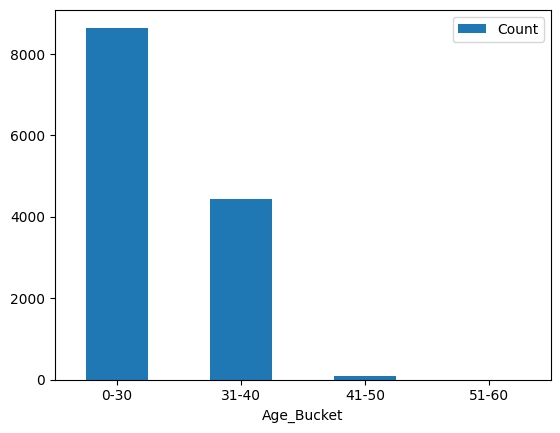

In [ ]:
Age_wise_count.plot.bar('Age_Bucket',rot=0)

In [ ]:
Restaurant_cate=pd.DataFrame(data4.groupby(by='RESTAURANT_CATEGORY')['EMPLOYEE_COUNT'].sum()).reset_index()
Restaurant_cate

,RESTAURANT_CATEGORY,EMPLOYEE_COUNT
0,Beverage and Bar Service,3227.0
1,Food Preparation and Cooking,3165.0
2,Food Service Establishments,303166.0
3,Retail Food Outlets,470.0


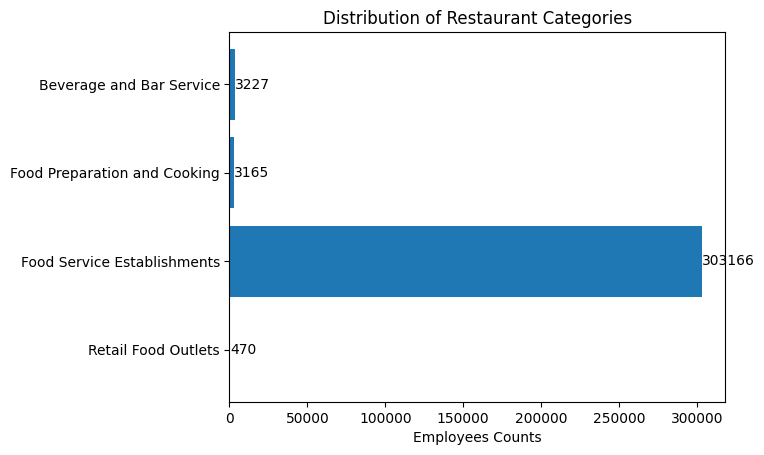

In [ ]:
bars=plt.barh(Restaurant_cate['RESTAURANT_CATEGORY'], Restaurant_cate['EMPLOYEE_COUNT'])
plt.xlabel('Employees Counts')
plt.title('Distribution of Restaurant Categories')
plt.gca().invert_yaxis()
for bar, count in zip(bars, Restaurant_cate['EMPLOYEE_COUNT']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(count), ha='left', va='center', fontsize=10)
plt.show()

In [ ]:
grade_wisecount=data4.groupby(['CURRENT_GRADE']).count().reset_index()
grade_wisecount=grade_wisecount.iloc[::,:2].copy()
grade_wisecount.rename(columns={'RESTAURANT_CATEGORY':'Count'})

,CURRENT_GRADE,Count
0,A,11709
1,B,208
2,C,1265


<Axes: xlabel='CURRENT_GRADE'>

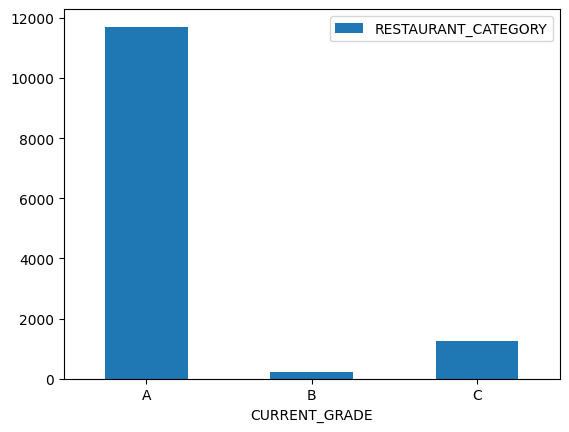

In [ ]:
grade_wisecount.plot.bar(x='CURRENT_GRADE',rot=0)

In [ ]:
empage_currgrad=data4.loc[::,['MEDIAN_EMPLOYEE_AGE','CURRENT_GRADE']].copy()

In [ ]:
empage_currgrad

,MEDIAN_EMPLOYEE_AGE,CURRENT_GRADE
0,27.959983,C
1,27.719365,A
2,26.442637,A
3,33.988293,A
5,25.947206,A
...,...,...
15668,27.265494,A
15669,18.216549,A
15670,32.334711,A
15671,36.076705,C


In [ ]:
median_age_bins = [18, 30, 40, 50]
median_age_labels = ['18-30', '31-40', '41-50']
empage_currgrad['MEDIAN_EMPLOYEE_AGE_bucket'] = pd.cut(empage_currgrad['MEDIAN_EMPLOYEE_AGE'], bins=median_age_bins, labels=median_age_labels, include_lowest=True)

In [ ]:
empage_currgrad

,MEDIAN_EMPLOYEE_AGE,CURRENT_GRADE,MEDIAN_EMPLOYEE_AGE_bucket
0,27.959983,C,18-30
1,27.719365,A,18-30
2,26.442637,A,18-30
3,33.988293,A,31-40
5,25.947206,A,18-30
...,...,...,...
15668,27.265494,A,18-30
15669,18.216549,A,18-30
15670,32.334711,A,31-40
15671,36.076705,C,31-40


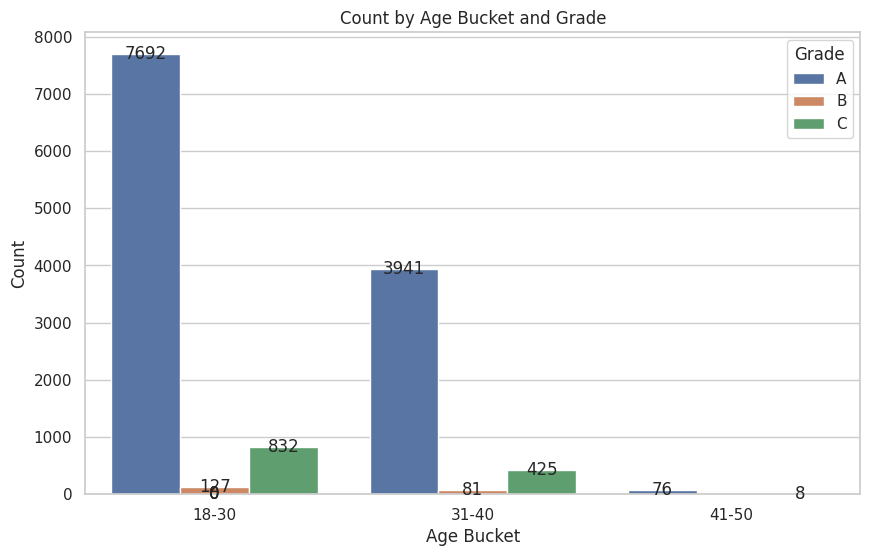

In [ ]:
grade_order = ['A', 'B', 'C']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="MEDIAN_EMPLOYEE_AGE_bucket", hue="CURRENT_GRADE", data=empage_currgrad, hue_order=grade_order)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center')

ax.set(xlabel="Age Bucket", ylabel="Count")
plt.title("Count by Age Bucket and Grade")
plt.legend(title="Grade", labels=grade_order)

plt.show()


In [ ]:
violation_cnt=data4.loc[::,['FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']]
violation_cnt

,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE
0,Critical,Major,Critical
1,Major,Major,Non-Major
2,Critical,Major,Non-Major
3,Major,Non-Major,Non-Major
5,Critical,Major,Major
...,...,...,...
15668,Critical,Non-Major,Non-Major
15669,Major,Non-Major,Non-Major
15670,Critical,Major,Major
15671,Major,Major,Non-Major


#Variety of Hypothesis Tests

CURRENT_DEMERITS & CURRENT_GRADE

In [ ]:
data4=data4.dropna().copy()


In [ ]:
data4['NEXT_INSPECTION_GRADE_C_OR_BELOW'].unique()

array([0., 1.])

In [ ]:
data4=data4.drop(columns=['INSPECTION_DEMERITS_bucket']).copy()
data4

,RESTAURANT_CATEGORY,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,Age_Bucket,Demerit_Bucket
0,Food Service Establishments,0.0,C,25.0,27.959983,13.004886,11.0,204.0,215.0,302.0,Critical,Major,Critical,4,0.0,0-30,0-30
1,Food Service Establishments,3.0,A,7.0,27.719365,3.922086,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5,0.0,0-30,0-30
2,Food Service Establishments,8.0,A,23.0,26.442637,10.312777,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3,1.0,0-30,0-30
3,Food Preparation and Cooking,0.0,A,14.0,33.988293,4.163975,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0.0,31-40,0-30
5,Food Service Establishments,3.0,A,43.0,25.947206,3.839934,17.0,206.0,211.0,215.0,Critical,Major,Major,7,0.0,0-30,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,1.0,A,24.0,27.265494,1.858442,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5,0.0,0-30,0-30
15669,Food Service Establishments,6.0,A,21.0,18.216549,6.797710,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5,0.0,0-30,0-30
15670,Food Service Establishments,9.0,A,6.0,32.334711,2.341416,17.0,209.0,213.0,217.0,Critical,Major,Major,5,0.0,31-40,0-30
15671,Food Service Establishments,3.0,C,11.0,36.076705,1.278035,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3,0.0,31-40,0-30


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
observed = pd.crosstab(data4['RESTAURANT_CATEGORY'], data4['NEXT_INSPECTION_GRADE_C_OR_BELOW'])
observed

NEXT_INSPECTION_GRADE_C_OR_BELOW,0.0,1.0
RESTAURANT_CATEGORY,,
Beverage and Bar Service,165,41
Food Preparation and Cooking,180,28
Food Service Establishments,10586,2158
Retail Food Outlets,16,8


In [ ]:
chi2, p, _, _ = chi2_contingency(observed)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 7.650847665086115
P-value: 0.05380661716853725


In [ ]:
observed2 = pd.crosstab(data4['FIRST_VIOLATION_TYPE'], data4['NEXT_INSPECTION_GRADE_C_OR_BELOW']) #dropped
observed2


NEXT_INSPECTION_GRADE_C_OR_BELOW,0.0,1.0
FIRST_VIOLATION_TYPE,,
Critical,4965,1104
Major,4849,911
Non-Major,1133,220


In [ ]:
chi2, p, _, _ = chi2_contingency(observed2)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 12.354075132049537
P-value: 0.002076570454491064


In [ ]:
observed3 = pd.crosstab(data4['SECOND_VIOLATION_TYPE'], data4['NEXT_INSPECTION_GRADE_C_OR_BELOW']) #dropped
observed3


NEXT_INSPECTION_GRADE_C_OR_BELOW,0.0,1.0
SECOND_VIOLATION_TYPE,,
Critical,2002,529
Major,5707,1059
Non-Major,3238,647


In [ ]:
chi2, p, _, _ = chi2_contingency(observed3)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 36.398639877563944
P-value: 1.247773552505243e-08


In [ ]:
observed4 = pd.crosstab(data4['THIRD_VIOLATION_TYPE'], data4['NEXT_INSPECTION_GRADE_C_OR_BELOW']) #dropped
observed4


NEXT_INSPECTION_GRADE_C_OR_BELOW,0.0,1.0
THIRD_VIOLATION_TYPE,,
Critical,590,154
Major,5116,1086
Non-Major,5241,995


In [ ]:
chi2, p, _, _ = chi2_contingency(observed4)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 13.188036745178811
P-value: 0.001368529637780553


In [ ]:
observed5 = pd.crosstab(data4['CURRENT_GRADE'], data4['NEXT_INSPECTION_GRADE_C_OR_BELOW']) #dropped
observed5


NEXT_INSPECTION_GRADE_C_OR_BELOW,0.0,1.0
CURRENT_GRADE,,
A,9544,2165
B,174,34
C,1229,36


In [ ]:
chi2, p, _, _ = chi2_contingency(observed5)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 198.49742765674608
P-value: 7.885536536914038e-44


In [ ]:
corr=data4.corr()
corr

<ipython-input-99-0b67ad83bf04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data4.corr()


,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
CURRENT_DEMERITS,1.000000,0.010925,0.013819,-0.011388,0.084028,0.002360,-0.000799,-0.002586,0.098365,0.006038
EMPLOYEE_COUNT,0.010925,1.000000,-0.000638,0.012379,0.000822,-0.000099,0.004576,0.004225,0.001136,0.019294
MEDIAN_EMPLOYEE_AGE,0.013819,-0.000638,1.000000,0.008291,0.001651,0.003275,0.010874,0.009997,0.002701,-0.012058
MEDIAN_EMPLOYEE_TENURE,-0.011388,0.012379,0.008291,1.000000,-0.010532,-0.007020,0.010880,0.011406,-0.014748,0.002836
INSPECTION_DEMERITS,0.084028,0.000822,0.001651,-0.010532,1.000000,-0.003455,0.165583,0.139574,0.876760,0.060911
FIRST_VIOLATION,0.002360,-0.000099,0.003275,-0.007020,-0.003455,1.000000,-0.016131,-0.016336,-0.001853,-0.003928
SECOND_VIOLATION,-0.000799,0.004576,0.010874,0.010880,0.165583,-0.016131,1.000000,0.987064,0.150414,0.007493
THIRD_VIOLATION,-0.002586,0.004225,0.009997,0.011406,0.139574,-0.016336,0.987064,1.000000,0.115047,0.004113
NUMBER_OF_VIOLATIONS,0.098365,0.001136,0.002701,-0.014748,0.876760,-0.001853,0.150414,0.115047,1.000000,0.060718
NEXT_INSPECTION_GRADE_C_OR_BELOW,0.006038,0.019294,-0.012058,0.002836,0.060911,-0.003928,0.007493,0.004113,0.060718,1.000000


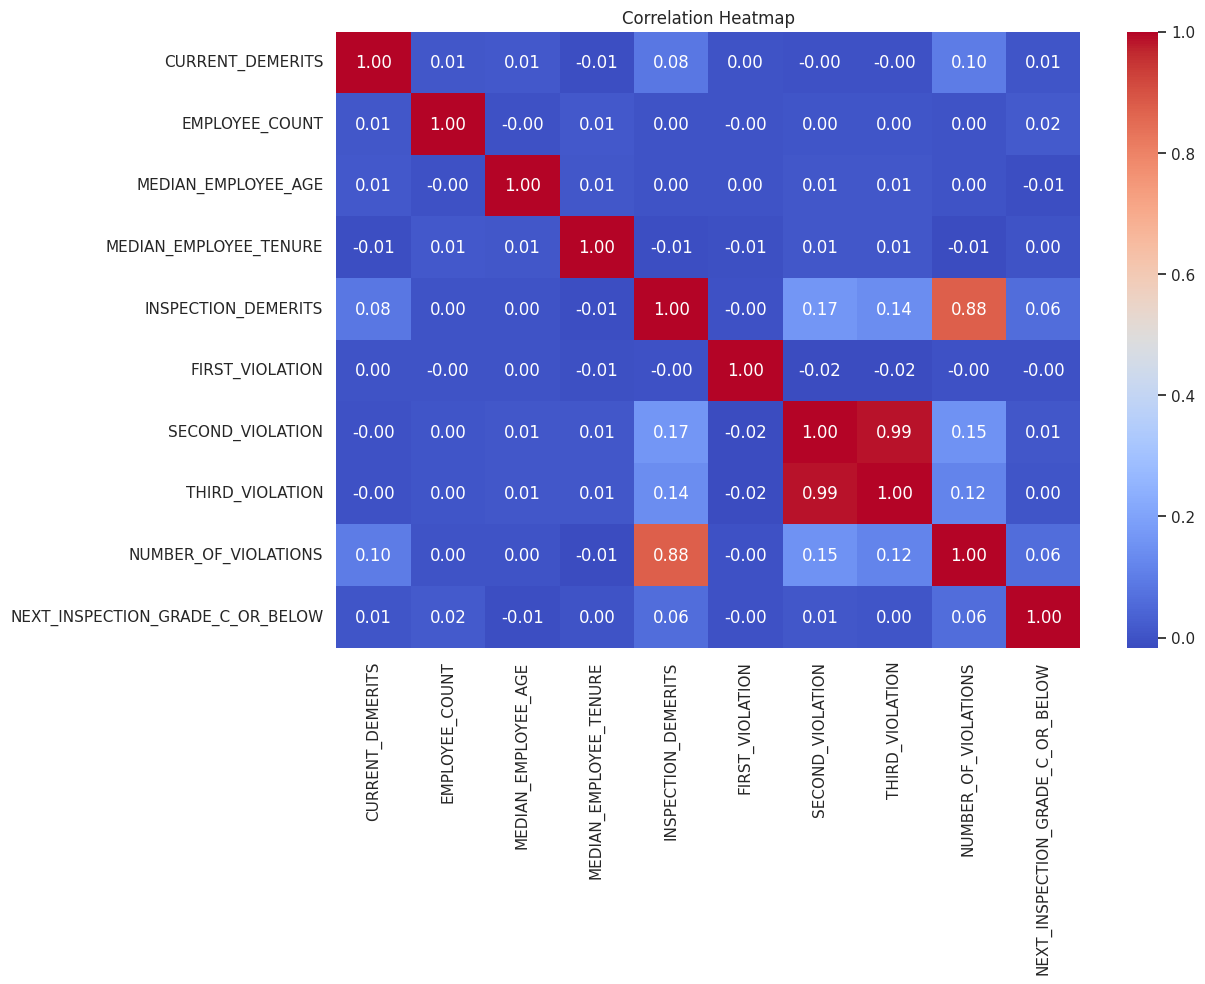

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

You can drop either SECOND_VIOLATION or THIRD_VIOLATION as they are having strong correlation.




In [ ]:
cols=['RESTAURANT_CATEGORY','CURRENT_GRADE','CURRENT_DEMERITS','EMPLOYEE_COUNT','MEDIAN_EMPLOYEE_AGE',
      'MEDIAN_EMPLOYEE_TENURE','FIRST_VIOLATION',
      'SECOND_VIOLATION','NUMBER_OF_VIOLATIONS','NEXT_INSPECTION_GRADE_C_OR_BELOW']
data5=data4.loc[::,cols].copy()
data5

,RESTAURANT_CATEGORY,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Service Establishments,C,0.0,25.0,27.959983,13.004886,204.0,215.0,4,0.0
1,Food Service Establishments,A,3.0,7.0,27.719365,3.922086,214.0,216.0,5,0.0
2,Food Service Establishments,A,8.0,23.0,26.442637,10.312777,202.0,215.0,3,1.0
3,Food Preparation and Cooking,A,0.0,14.0,33.988293,4.163975,214.0,230.0,3,0.0
5,Food Service Establishments,A,3.0,43.0,25.947206,3.839934,206.0,211.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...
15668,Food Service Establishments,A,1.0,24.0,27.265494,1.858442,2.0,19.0,5,0.0
15669,Food Service Establishments,A,6.0,21.0,18.216549,6.797710,213.0,225.0,5,0.0
15670,Food Service Establishments,A,9.0,6.0,32.334711,2.341416,209.0,213.0,5,0.0
15671,Food Service Establishments,C,3.0,11.0,36.076705,1.278035,214.0,215.0,3,0.0


In [ ]:
data5.var(numeric_only=True)

CURRENT_DEMERITS                    1.711012e+01
EMPLOYEE_COUNT                      9.420526e+05
MEDIAN_EMPLOYEE_AGE                 2.383612e+01
MEDIAN_EMPLOYEE_TENURE              4.078825e+00
FIRST_VIOLATION                     5.709164e+09
SECOND_VIOLATION                    6.399616e+03
NUMBER_OF_VIOLATIONS                8.507533e+00
NEXT_INSPECTION_GRADE_C_OR_BELOW    1.408131e-01
dtype: float64

<ipython-input-108-2763a51cb3a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data5.corr()


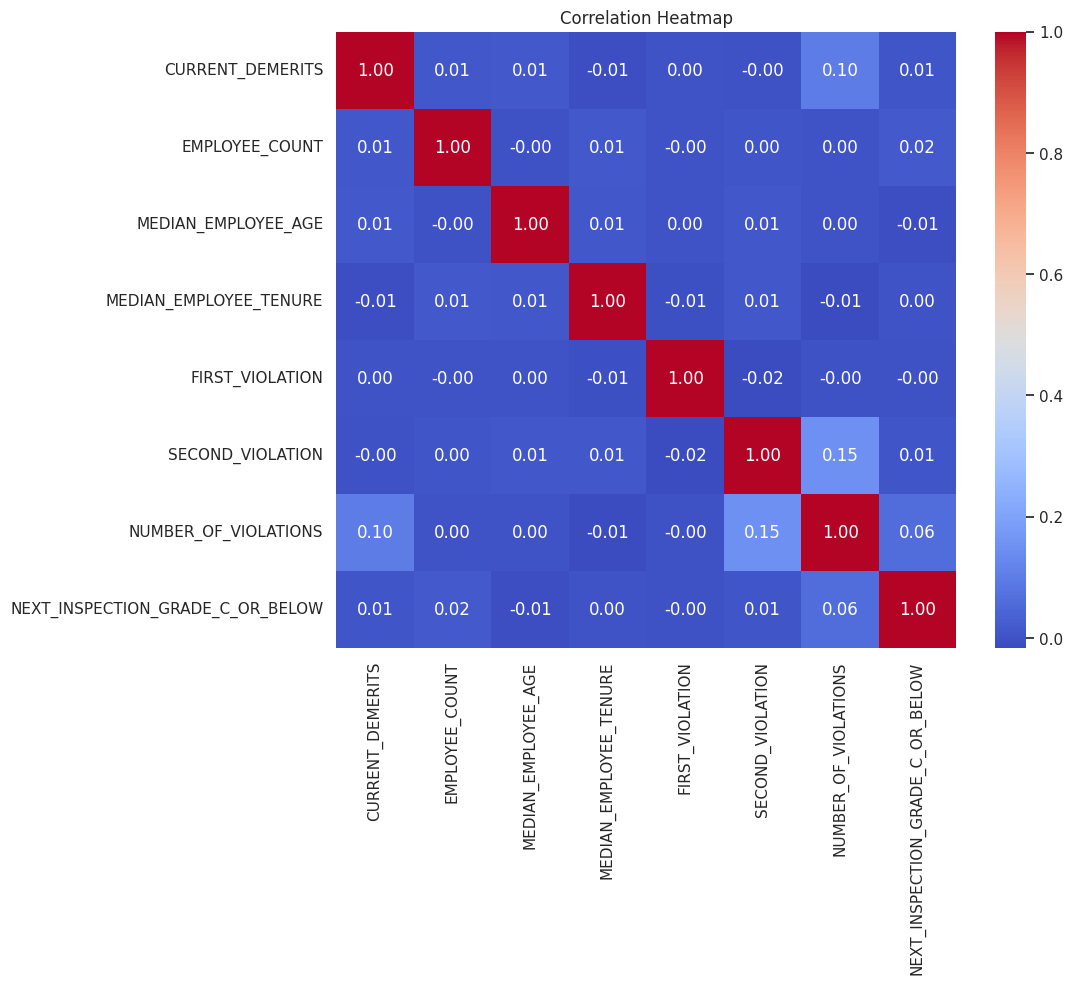

In [ ]:
correlation_matrix = data5.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data5.to_csv('/content/drive/MyDrive/Nationwide/filtered_data.csv')


In [4]:
df1=pd.read_csv('/content/drive/MyDrive/Nationwide/filtered_data.csv')
df1=df1.drop(columns=['Unnamed: 0']).copy()
df1

,RESTAURANT_CATEGORY,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Service Establishments,C,0.0,25.0,27.959983,13.004886,204.0,215.0,4,0.0
1,Food Service Establishments,A,3.0,7.0,27.719365,3.922086,214.0,216.0,5,0.0
2,Food Service Establishments,A,8.0,23.0,26.442637,10.312777,202.0,215.0,3,1.0
3,Food Preparation and Cooking,A,0.0,14.0,33.988293,4.163975,214.0,230.0,3,0.0
4,Food Service Establishments,A,3.0,43.0,25.947206,3.839934,206.0,211.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...
13177,Food Service Establishments,A,1.0,24.0,27.265494,1.858442,2.0,19.0,5,0.0
13178,Food Service Establishments,A,6.0,21.0,18.216549,6.797710,213.0,225.0,5,0.0
13179,Food Service Establishments,A,9.0,6.0,32.334711,2.341416,209.0,213.0,5,0.0
13180,Food Service Establishments,C,3.0,11.0,36.076705,1.278035,214.0,215.0,3,0.0


In [5]:
grade_mapping = {'A': 2, 'B': 1, 'C': 0}
df1['CURRENT_GRADE'] = df1['CURRENT_GRADE'].map(grade_mapping)
df1

,RESTAURANT_CATEGORY,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Service Establishments,0,0.0,25.0,27.959983,13.004886,204.0,215.0,4,0.0
1,Food Service Establishments,2,3.0,7.0,27.719365,3.922086,214.0,216.0,5,0.0
2,Food Service Establishments,2,8.0,23.0,26.442637,10.312777,202.0,215.0,3,1.0
3,Food Preparation and Cooking,2,0.0,14.0,33.988293,4.163975,214.0,230.0,3,0.0
4,Food Service Establishments,2,3.0,43.0,25.947206,3.839934,206.0,211.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...
13177,Food Service Establishments,2,1.0,24.0,27.265494,1.858442,2.0,19.0,5,0.0
13178,Food Service Establishments,2,6.0,21.0,18.216549,6.797710,213.0,225.0,5,0.0
13179,Food Service Establishments,2,9.0,6.0,32.334711,2.341416,209.0,213.0,5,0.0
13180,Food Service Establishments,0,3.0,11.0,36.076705,1.278035,214.0,215.0,3,0.0


In [6]:
!pip install faker-file
from faker import Faker
import random
faker = Faker()

# Generate dummy reviews for each record
positive_reviews = []
negative_reviews = []
for index, row in df1.iterrows():
    if row['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == 1:  # Assuming 1 indicates Grade C
        negative_reviews.append(faker.paragraph())
    else:
        positive_reviews.append(faker.paragraph())



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.2 MB/s eta 0:00:00


In [7]:
random.shuffle(positive_reviews)
random.shuffle(negative_reviews)

reviews = positive_reviews + negative_reviews

# Add the dummy reviews to your dataset
df1['review_text'] = reviews
df1

,RESTAURANT_CATEGORY,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,review_text
0,Food Service Establishments,0,0.0,25.0,27.959983,13.004886,204.0,215.0,4,0.0,Campaign relationship many mission require red...
1,Food Service Establishments,2,3.0,7.0,27.719365,3.922086,214.0,216.0,5,0.0,Since tough forget note foreign enough picture...
2,Food Service Establishments,2,8.0,23.0,26.442637,10.312777,202.0,215.0,3,1.0,Participant read clearly past. Again go materi...
3,Food Preparation and Cooking,2,0.0,14.0,33.988293,4.163975,214.0,230.0,3,0.0,Focus sea phone father particularly. Player be...
4,Food Service Establishments,2,3.0,43.0,25.947206,3.839934,206.0,211.0,7,0.0,Though thousand by sound develop value. Field ...
...,...,...,...,...,...,...,...,...,...,...,...
13177,Food Service Establishments,2,1.0,24.0,27.265494,1.858442,2.0,19.0,5,0.0,Step behavior yet. American bar born bill poin...
13178,Food Service Establishments,2,6.0,21.0,18.216549,6.797710,213.0,225.0,5,0.0,Sing class test however similar join. New say ...
13179,Food Service Establishments,2,9.0,6.0,32.334711,2.341416,209.0,213.0,5,0.0,Draw boy between charge body. Interview guess ...
13180,Food Service Establishments,0,3.0,11.0,36.076705,1.278035,214.0,215.0,3,0.0,Ever political part bag against through.


In [8]:
import spacy

In [9]:
df1['review_text']

0        Campaign relationship many mission require red...
1        Since tough forget note foreign enough picture...
2        Participant read clearly past. Again go materi...
3        Focus sea phone father particularly. Player be...
4        Though thousand by sound develop value. Field ...
                               ...                        
13177    Step behavior yet. American bar born bill poin...
13178    Sing class test however similar join. New say ...
13179    Draw boy between charge body. Interview guess ...
13180             Ever political part bag against through.
13181    Itself next help sound anything know probably....
Name: review_text, Length: 13182, dtype: object

In [10]:
nlp=spacy.load('en_core_web_sm')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


In [11]:
def preprocess(text):
  prep_text=[]
  doc=nlp(text)
  for tokens in doc:
    if tokens.is_punct:
      continue
    else:

      stemm=stemmer.stem(tokens.lemma_)
      prep_text.append(stemm)

  return " ".join(prep_text)


In [12]:
df1['clean_text']=df1['review_text'].apply(preprocess)

In [13]:
print(df1['review_text'],"|",  df1['clean_text'])

0        Campaign relationship many mission require red...
1        Since tough forget note foreign enough picture...
2        Participant read clearly past. Again go materi...
3        Focus sea phone father particularly. Player be...
4        Though thousand by sound develop value. Field ...
                               ...                        
13177    Step behavior yet. American bar born bill poin...
13178    Sing class test however similar join. New say ...
13179    Draw boy between charge body. Interview guess ...
13180             Ever political part bag against through.
13181    Itself next help sound anything know probably....
Name: review_text, Length: 13182, dtype: object | 0        campaign relationship mani mission requir red ...
1        sinc tough forget note foreign enough pictur b...
2        particip read clearli past again go materi so ...
3        focu sea phone father particularli player beau...
4        though thousand by sound develop valu field fu...
      

In [14]:

cols=[ 'CURRENT_GRADE', 'CURRENT_DEMERITS',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'FIRST_VIOLATION', 'SECOND_VIOLATION', 'NUMBER_OF_VIOLATIONS','clean_text','NEXT_INSPECTION_GRADE_C_OR_BELOW']
df2=df1.loc[::,cols].copy()
df2

,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,clean_text,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,0,0.0,25.0,27.959983,13.004886,204.0,215.0,4,campaign relationship mani mission requir red ...,0.0
1,2,3.0,7.0,27.719365,3.922086,214.0,216.0,5,sinc tough forget note foreign enough pictur b...,0.0
2,2,8.0,23.0,26.442637,10.312777,202.0,215.0,3,particip read clearli past again go materi so ...,1.0
3,2,0.0,14.0,33.988293,4.163975,214.0,230.0,3,focu sea phone father particularli player beau...,0.0
4,2,3.0,43.0,25.947206,3.839934,206.0,211.0,7,though thousand by sound develop valu field fu...,0.0
...,...,...,...,...,...,...,...,...,...,...
13177,2,1.0,24.0,27.265494,1.858442,2.0,19.0,5,step behavior yet american bar bear bill point...,0.0
13178,2,6.0,21.0,18.216549,6.797710,213.0,225.0,5,sing class test howev similar join new say whi...,0.0
13179,2,9.0,6.0,32.334711,2.341416,209.0,213.0,5,draw boy between charg bodi interview guess em...,0.0
13180,0,3.0,11.0,36.076705,1.278035,214.0,215.0,3,ever polit part bag against through,0.0


In [16]:
!pip install gensim

from gensim.models import Word2Vec

In [30]:

model = Word2Vec(sentences=df2['clean_text'], vector_size=100, min_count=1)

def get_sentence_embedding(text):
    embeddings = []
    for token in text:
        if token in model.wv:
            embeddings.append(model.wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0)  # for dimension reduction 1 vector for each sentence
    else:
        return None

df2['sentence_embedding'] = df2['clean_text'].apply(get_sentence_embedding)


In [31]:
df2.dtypes

CURRENT_GRADE                         int64
CURRENT_DEMERITS                    float64
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                 float64
MEDIAN_EMPLOYEE_TENURE              float64
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
NUMBER_OF_VIOLATIONS                  int64
clean_text                           object
NEXT_INSPECTION_GRADE_C_OR_BELOW    float64
sentence_embedding                   object
dtype: object

In [32]:
df2['sentence_embedding'][0]

array([ 0.03004363,  0.08317078,  0.09550236, -0.06928374,  0.06611689,
       -0.00806711,  0.01301505,  0.15505402, -0.02369803, -0.06027828,
        0.01307131, -0.09386578,  0.03494856, -0.01800419,  0.04398645,
       -0.04855976,  0.14219593,  0.00627049, -0.00402341, -0.12376252,
       -0.02682271, -0.11921869,  0.1024548 , -0.17347781, -0.09913266,
        0.03913364, -0.03214537,  0.10037912,  0.03409034,  0.10029674,
        0.06015294, -0.14469543, -0.07767008, -0.09183762, -0.0127808 ,
       -0.01638631,  0.07992728,  0.04499271,  0.00444323,  0.06890672,
        0.06319097, -0.00566955, -0.06001988,  0.07310832, -0.02448885,
        0.00720989,  0.06707465, -0.02974996, -0.10356058,  0.02712358,
        0.06629088, -0.04504639,  0.04222046, -0.0500062 , -0.08131387,
       -0.04309437,  0.01824698,  0.06588058,  0.02298952, -0.03133682,
       -0.10523876, -0.09593013,  0.00052304, -0.00892976, -0.07745489,
        0.20049515,  0.13526665,  0.03186933, -0.09016507,  0.04

Dataset is Imbalanced

In [33]:
score_0=df2[df2['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]
score_1=df2[df2['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]

In [34]:
print(score_0.shape,score_1.shape)

(10947, 11) (2235, 11)


Dataset is Imbalance

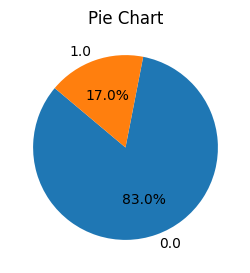

In [35]:
df2_ = df2['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(df2_, labels=df2_.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.show()

In [ ]:
#df2 = pd.concat([df2, pd.DataFrame(df2['sentence_embedding'].tolist())], axis=1).drop('sentence_embedding', axis=1)
df2=df2.drop(columns=['clean_text'],axis=1).copy()
df2

In [53]:
df2.dtypes

CURRENT_GRADE               int64
CURRENT_DEMERITS          float64
EMPLOYEE_COUNT            float64
MEDIAN_EMPLOYEE_AGE       float64
MEDIAN_EMPLOYEE_TENURE    float64
                           ...   
95                        float32
96                        float32
97                        float32
98                        float32
99                        float32
Length: 109, dtype: object

In [54]:
X=df2.drop(columns=['NEXT_INSPECTION_GRADE_C_OR_BELOW'],axis=1)
X.columns = X.columns.astype(str)

Y=df2.loc[::,'NEXT_INSPECTION_GRADE_C_OR_BELOW']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [ ]:
!pip install imbalanced-learn scikit-learn

In [55]:

from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
smk = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smk.fit_resample(X_train, y_train)

In [ ]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_resampled, y_train_resampled)


In [57]:
y_train_resampled.value_counts()

NEXT_INSPECTION_GRADE_C_OR_BELOW
1.0    8629
0.0    8629
Name: count, dtype: int64

In [59]:
param_grid_cat = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'auto_class_weights': [None, 'Balanced']
}
catboost = CatBoostClassifier()

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid_cat, cv=3, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5201, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2381, in _fit
    t

0:	learn: 0.6901087	total: 132ms	remaining: 13.1s
1:	learn: 0.6876971	total: 184ms	remaining: 9.02s
2:	learn: 0.6850853	total: 244ms	remaining: 7.88s
3:	learn: 0.6810101	total: 300ms	remaining: 7.2s
4:	learn: 0.6776801	total: 365ms	remaining: 6.94s
5:	learn: 0.6760661	total: 424ms	remaining: 6.64s
6:	learn: 0.6731438	total: 491ms	remaining: 6.53s
7:	learn: 0.6722775	total: 506ms	remaining: 5.82s
8:	learn: 0.6702665	total: 575ms	remaining: 5.81s
9:	learn: 0.6690116	total: 618ms	remaining: 5.56s
10:	learn: 0.6678246	total: 687ms	remaining: 5.56s
11:	learn: 0.6659425	total: 749ms	remaining: 5.49s
12:	learn: 0.6653802	total: 810ms	remaining: 5.42s
13:	learn: 0.6639121	total: 867ms	remaining: 5.33s
14:	learn: 0.6631129	total: 930ms	remaining: 5.27s
15:	learn: 0.6622614	total: 989ms	remaining: 5.19s
16:	learn: 0.6606107	total: 1.06s	remaining: 5.17s
17:	learn: 0.6600490	total: 1.12s	remaining: 5.1s
18:	learn: 0.6594451	total: 1.18s	remaining: 5.01s
19:	learn: 0.6589258	total: 1.24s	remaining

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c7c047e0dc0>,
             n_jobs=-1,
             param_grid={'auto_class_weights': [None, 'Balanced'],
                         'depth': [6, 8], 'iterations': [100, 200],
                         'learning_rate': [0.05, 0.1]},
             scoring='f1')

In [60]:
best_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_clf.predict(X_test)


In [126]:
y_pred=best_clf.predict_proba(X_test)



In [128]:
from sklearn.metrics import precision_score, classification_report,recall_score
precision = precision_score(y_test, y_pred)
precision

0.5804195804195804

In [137]:
from tensorflow.keras.metrics import Precision

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, batch_size=32, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
330/330 [==============================] - 5s 3ms/step - loss: 0.4605 - accuracy: 0.8284
Epoch 2/10
330/330 [==============================] - 2s 5ms/step - loss: 0.4581 - accuracy: 0.8288
Epoch 3/10
330/330 [==============================] - 2s 5ms/step - loss: 0.4579 - accuracy: 0.8288
Epoch 4/10
330/330 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.8288
Epoch 5/10
330/330 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.8287
Epoch 6/10
330/330 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8288
Epoch 7/10
330/330 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.8287
Epoch 8/10
330/330 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8287
Epoch 9/10
330/330 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.8287
Epoch 10/10
83/83 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8373
T

In [134]:
y_predl=model.predict(X_test_reshaped)

83/83 [==============================] - 1s 4ms/step


In [213]:
binary_predictions=[]
for i in y_predl:
  if i>0.4:
    binary_predictions.append(1)
  else:
    binary_predictions.append(0)

In [214]:
precision = recall_score(y_test, binary_predictions)
precision

0.8018648018648019

In [202]:
feature_importance = best_clf.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [142]:
importance_df

,Feature,Importance
0,CURRENT_GRADE,25.572232
1,CURRENT_DEMERITS,5.300659
7,NUMBER_OF_VIOLATIONS,1.724461
18,10,1.635967
42,34,1.434143
...,...,...
50,42,0.097693
24,16,0.089125
96,88,0.057164
4,MEDIAN_EMPLOYEE_TENURE,0.053256


<Axes: ylabel='Feature'>

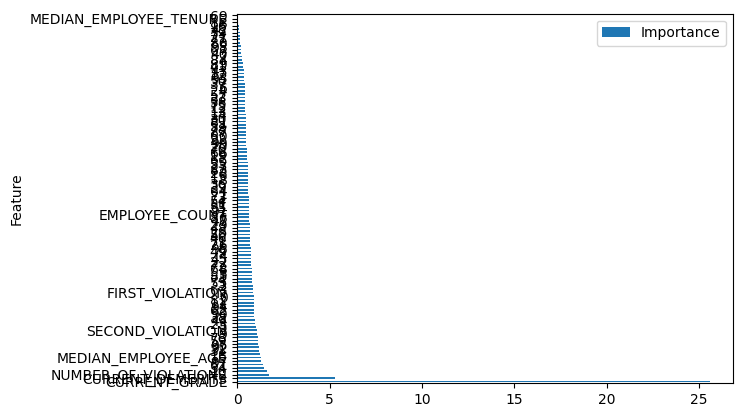

In [143]:
importance_df.plot.barh('Feature')

In [ ]:
importance_df

,Feature,Importance
1,1,36.101204
7,7,18.137199
0,0,15.420021
5,5,12.727043
6,6,7.769543
2,2,5.652406
3,3,2.141829
4,4,2.050750


<Axes: ylabel='Feature'>

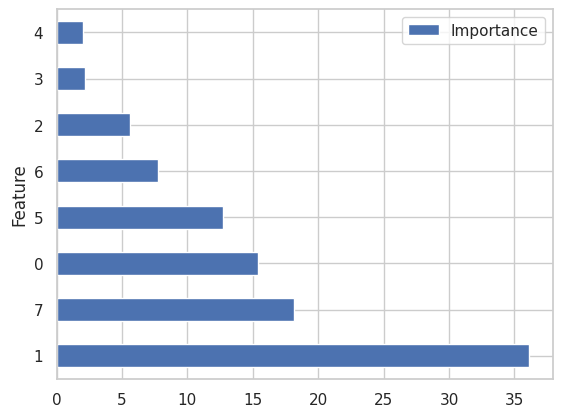

In [ ]:
importance_df.plot.barh('Feature')

#TEST DATA

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/Nationwide/NEW_SAMPLE_2023.csv')
test_data

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATAGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
0,DA1050454,PR0022396,TE PUB EXHIB KITCHEN,TE PUB @ CRYSTALS,Special Kitchen,3720 S LAS VEGAS,Las Vegas,Nevada,89158,6,...,209.0,213,217,Critical,Major,Major,5,3.000000,31.141933,3.542119
1,DA0986444,PR0014531,Plaza Hotel Showroom Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Las Vegas,Nevada,89101-6370,0,...,214.0,222,227,Major,Major,Non-Major,4,18.598406,26.839893,4.885881
2,DA1284914,PR0014520,Plaza Hotel Race & Sportsbook Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Overton,Nevada,89101-6370,8,...,211.0,212,213,Major,Major,Major,6,5.730357,31.202256,1.883055
3,DA1281903,PR0014203,Prommares Thai Food,Prommares Thai Food,Restaurant,6362 W Sahara Ave,Las Vegas,Nevada,89146-3050,0,...,202.0,206,209,1,Critical,Critical,11,15.075238,36.656000,6.761476
4,DA1004708,PR0017538,ROCCOS NY PIZZA,ROCCOS NY PIZZA,Restaurant,1910 VILLAGE CENTER Cir,Las Vegas,Nevada,89134,9,...,213.0,214,226,Major,Major,Non-Major,6,14.218813,21.001225,6.601620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,DA0922689,PR0001950,POPEYES CHICKEN #2295,POPEYES CHICKEN #2295,Restaurant,2421 W Bonanza Rd,Las Vegas,Nevada,89106-4706,0,...,202.0,214,215,Critical,Major,Major,6,15.230494,33.780673,4.008016
7501,DA1031095,PR0011662,Thai House Restaurant,Thai House Restaurant,Restaurant,9850 S Maryland Pkwy,Las Vegas,Nevada,89183-7146,6,...,214.0,229,233,Major,Non-Major,Non-Major,3,25.409139,31.688779,3.453527
7502,DA0633450,PR0024079,Hottie Dog,Hottie Dog,Portable Unit,851 S Pavilion Center Dr,North Las Vegas,Nevada,89144-4566,8,...,13.0,28,113,Major,Non-Major,Major,3,16.694861,26.272563,3.070719
7503,DA0998980,PR0014977,TRUMP TOWER 1 FINE DINING BAR,TRUMP INTL HOTEL & TOWER,Bar / Tavern,2000 N Fashion Show Dr,Las Vegas,Nevada,89109-1936,3,...,212.0,214,231,Major,Major,Non-Major,4,25.367641,19.612605,6.637496


In [ ]:
cols_to_drop=['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER','RESTAURANT_NAME', 'RESTAURANT_LOCATION','ZIP'
,'ADDRESS','CITY','STATE','INSPECTION_TIME','INSPECTION_TYPE','VIOLATIONS_RAW','RECORD_UPDATED','LAT_LONG_RAW','THIRD_VIOLATION',
              'INSPECTION_DEMERITS','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']
test_data=test_data.drop(columns=cols_to_drop,axis=1).copy()

In [ ]:
test_data

,RESTAURANT_CATAGORY,CURRENT_DEMERITS,current_grade,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
0,Special Kitchen,6,A,209.0,213,5,3.000000,31.141933,3.542119
1,Bar / Tavern,0,A,214.0,222,4,18.598406,26.839893,4.885881
2,Bar / Tavern,8,A,211.0,212,6,5.730357,31.202256,1.883055
3,Restaurant,0,A,202.0,206,11,15.075238,36.656000,6.761476
4,Restaurant,9,A,213.0,214,6,14.218813,21.001225,6.601620
...,...,...,...,...,...,...,...,...,...
7500,Restaurant,0,A,202.0,214,6,15.230494,33.780673,4.008016
7501,Restaurant,6,A,214.0,229,3,25.409139,31.688779,3.453527
7502,Portable Unit,8,A,13.0,28,3,16.694861,26.272563,3.070719
7503,Bar / Tavern,3,A,212.0,214,4,25.367641,19.612605,6.637496


In [ ]:
test_data['current_grade'].unique()

array(['A', 'C', 'O', 'X', 'VVVVVV', 'Elephant', 'bb', 'N', nan],
      dtype=object)

In [ ]:
category_mapping_t1={
    'A':'A',
    'bb':'B',
    'C':'C'

}

In [ ]:
test_data['current_grade']=test_data['current_grade'].replace(category_mapping_t1)

In [ ]:
categories_to_keep = ['A', 'B', 'C']

test_data = test_data[test_data['current_grade'].isin(categories_to_keep)].copy()


In [ ]:
category_mapping_t2 = {
    'Special Kitchen': 'Food Service Establishments',
    'Bar / Tavern': 'Food Service Establishments',
    'Restaurant': 'Food Service Establishments',
    'Snack Bar': 'Food Service Establishments',
    'Elementary School Kitchen': 'Food Preparation and Cooking',
    'Portable Bar': 'Beverage and Bar Service',
    'Kitchen Bakery': 'Food Service Establishments',
    'Buffet': 'Food Service Establishments',
    'Meat/Poultry/Seafood': 'Food Preparation and Cooking',
    'Food Trucks / Mobile Vendor': 'Food Service Establishments',
    'Portable Unit': 'Beverage and Bar Service',
    'Institutional Food Service': 'Beverage and Bar Service',
    'Self-Service Food Truck': 'Food Service Establishments',
    'Vegetable Prep': 'Food Preparation and Cooking',
    'Garde Manger': 'Food Preparation and Cooking',
    'Pantry': 'Food Service Establishments',
    'Banquet Kitchen': 'Food Service Establishments',
    'Confection': 'Food Service Establishments',
    'Caterer': 'Food Service Establishments',
    'Banquet Support': 'Food Service Establishments',
    'Barbeque': 'Food Service Establishments',
    'Grocery Store Sampling': 'Retail Food Outlets',
    'Produce Market': 'Food Service Establishments',
    'Beer Bar': 'Beverage and Bar Service',
    'Concessions': 'Food Service Establishments',
    'Bakery Sales': 'Food Service Establishments',
    'Main Kitchen': 'Food Service Establishments',
    'Farmers Market': 'Food Service Establishments',
    'Childcare Kitchens': 'Food Service Establishments'
}


In [ ]:
test_data['RESTAURANT_CATAGORY'] = test_data['RESTAURANT_CATAGORY'].replace(category_mapping_t2)



In [ ]:
test_data['RESTAURANT_CATAGORY'].unique()

array(['Food Service Establishments', 'Food Preparation and Cooking',
       'Beverage and Bar Service', 'Retail Food Outlets'], dtype=object)

In [ ]:
one_hot = pd.get_dummies(test_data['RESTAURANT_CATAGORY'], prefix='Resturant')
grade_mapping = {'A': 2, 'B': 1, 'C': 0}
test_data = pd.concat([test_data, one_hot], axis=1)
test_data['current_grade'] = test_data['current_grade'].map(grade_mapping)
label_encoder = LabelEncoder()
test_data['current_grade'] = label_encoder.fit_transform(test_data['current_grade'])

test_data

,RESTAURANT_CATAGORY,CURRENT_DEMERITS,current_grade,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,Resturant_Beverage and Bar Service,Resturant_Food Preparation and Cooking,Resturant_Food Service Establishments,Resturant_Retail Food Outlets
0,Food Service Establishments,6,2,209.0,213,5,3.000000,31.141933,3.542119,0,0,1,0
1,Food Service Establishments,0,2,214.0,222,4,18.598406,26.839893,4.885881,0,0,1,0
2,Food Service Establishments,8,2,211.0,212,6,5.730357,31.202256,1.883055,0,0,1,0
3,Food Service Establishments,0,2,202.0,206,11,15.075238,36.656000,6.761476,0,0,1,0
4,Food Service Establishments,9,2,213.0,214,6,14.218813,21.001225,6.601620,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,Food Service Establishments,0,2,202.0,214,6,15.230494,33.780673,4.008016,0,0,1,0
7501,Food Service Establishments,6,2,214.0,229,3,25.409139,31.688779,3.453527,0,0,1,0
7502,Beverage and Bar Service,8,2,13.0,28,3,16.694861,26.272563,3.070719,1,0,0,0
7503,Food Service Establishments,3,2,212.0,214,4,25.367641,19.612605,6.637496,0,0,1,0


In [ ]:
test_data.columns

Index(['RESTAURANT_CATAGORY', 'CURRENT_DEMERITS', 'current_grade',
       'FIRST_VIOLATION', 'SECOND_VIOLATION', 'NUMBER_OF_VIOLATIONS',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'Resturant_Beverage and Bar Service',
       'Resturant_Food Preparation and Cooking',
       'Resturant_Food Service Establishments',
       'Resturant_Retail Food Outlets'],
      dtype='object')

In [ ]:
cols1t=['Resturant_Beverage and Bar Service','Resturant_Food Preparation and Cooking','Resturant_Food Service Establishments','Resturant_Retail Food Outlets',
      'CURRENT_DEMERITS', 'current_grade','EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'FIRST_VIOLATION', 'SECOND_VIOLATION',
       'NUMBER_OF_VIOLATIONS']

In [ ]:
test_data1=test_data.loc[::,cols1t].copy()
test_data1

,Resturant_Beverage and Bar Service,Resturant_Food Preparation and Cooking,Resturant_Food Service Establishments,Resturant_Retail Food Outlets,CURRENT_DEMERITS,current_grade,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS
0,0,0,1,0,6,2,3.000000,31.141933,3.542119,209.0,213,5
1,0,0,1,0,0,2,18.598406,26.839893,4.885881,214.0,222,4
2,0,0,1,0,8,2,5.730357,31.202256,1.883055,211.0,212,6
3,0,0,1,0,0,2,15.075238,36.656000,6.761476,202.0,206,11
4,0,0,1,0,9,2,14.218813,21.001225,6.601620,213.0,214,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0,0,1,0,0,2,15.230494,33.780673,4.008016,202.0,214,6
7501,0,0,1,0,6,2,25.409139,31.688779,3.453527,214.0,229,3
7502,1,0,0,0,8,2,16.694861,26.272563,3.070719,13.0,28,3
7503,0,0,1,0,3,2,25.367641,19.612605,6.637496,212.0,214,4


In [ ]:
test_data1=test_data1.rename(columns={'current_grade': 'CURRENT_GRADE'}).copy()
test_data1

,Resturant_Beverage and Bar Service,Resturant_Food Preparation and Cooking,Resturant_Food Service Establishments,Resturant_Retail Food Outlets,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS
0,0,0,1,0,6,2,3.000000,31.141933,3.542119,209.0,213,5
1,0,0,1,0,0,2,18.598406,26.839893,4.885881,214.0,222,4
2,0,0,1,0,8,2,5.730357,31.202256,1.883055,211.0,212,6
3,0,0,1,0,0,2,15.075238,36.656000,6.761476,202.0,206,11
4,0,0,1,0,9,2,14.218813,21.001225,6.601620,213.0,214,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7500,0,0,1,0,0,2,15.230494,33.780673,4.008016,202.0,214,6
7501,0,0,1,0,6,2,25.409139,31.688779,3.453527,214.0,229,3
7502,1,0,0,0,8,2,16.694861,26.272563,3.070719,13.0,28,3
7503,0,0,1,0,3,2,25.367641,19.612605,6.637496,212.0,214,4


In [ ]:
y_test=best_xgboost_model.predict(test_data1)

In [ ]:
test_data['NEXT_INSPECTION_GRADE_C_OR_BELOW']=y_test

In [ ]:
test_data

,RESTAURANT_CATAGORY,CURRENT_DEMERITS,current_grade,FIRST_VIOLATION,SECOND_VIOLATION,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,Resturant_Beverage and Bar Service,Resturant_Food Preparation and Cooking,Resturant_Food Service Establishments,Resturant_Retail Food Outlets,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Food Service Establishments,6,2,209.0,213,5,3.000000,31.141933,3.542119,0,0,1,0,0
1,Food Service Establishments,0,2,214.0,222,4,18.598406,26.839893,4.885881,0,0,1,0,1
2,Food Service Establishments,8,2,211.0,212,6,5.730357,31.202256,1.883055,0,0,1,0,0
3,Food Service Establishments,0,2,202.0,206,11,15.075238,36.656000,6.761476,0,0,1,0,0
4,Food Service Establishments,9,2,213.0,214,6,14.218813,21.001225,6.601620,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,Food Service Establishments,0,2,202.0,214,6,15.230494,33.780673,4.008016,0,0,1,0,1
7501,Food Service Establishments,6,2,214.0,229,3,25.409139,31.688779,3.453527,0,0,1,0,1
7502,Beverage and Bar Service,8,2,13.0,28,3,16.694861,26.272563,3.070719,1,0,0,0,1
7503,Food Service Establishments,3,2,212.0,214,4,25.367641,19.612605,6.637496,0,0,1,0,1


In [ ]:
a=pd.DataFrame(test_data.groupby(by='RESTAURANT_CATAGORY')['NEXT_INSPECTION_GRADE_C_OR_BELOW'].sum()).reset_index()
a

,RESTAURANT_CATAGORY,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Beverage and Bar Service,42
1,Food Preparation and Cooking,31
2,Food Service Establishments,3461
3,Retail Food Outlets,2


In [ ]:
b=test_data.groupby(by='RESTAURANT_CATAGORY').count().iloc[::,:1].reset_index()
b=b.rename(columns={'CURRENT_DEMERITS': 'Total Counts'}).copy()

In [ ]:
c=a.merge(b,on='RESTAURANT_CATAGORY')
c['Percentages with grade C']=(c['NEXT_INSPECTION_GRADE_C_OR_BELOW']/c['Total Counts'])*100
df=c.loc[::,['RESTAURANT_CATAGORY','Percentages with grade C']].copy()
df

,RESTAURANT_CATAGORY,Percentages with grade C
0,Beverage and Bar Service,32.812500
1,Food Preparation and Cooking,22.142857
2,Food Service Establishments,48.270572
3,Retail Food Outlets,40.000000


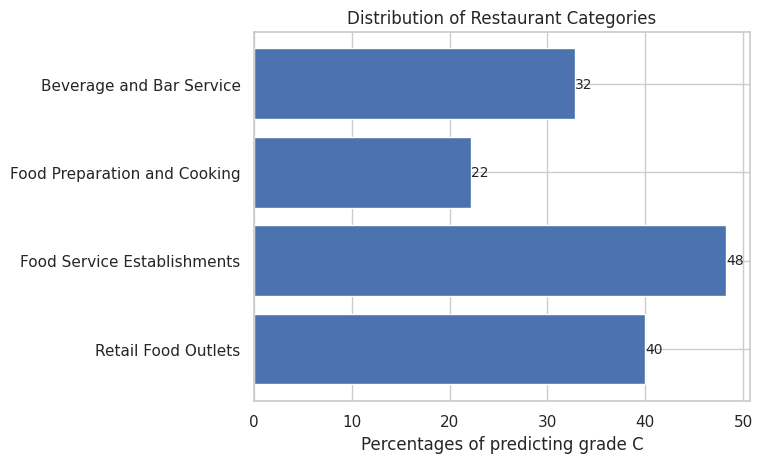

In [ ]:
bars=plt.barh(df['RESTAURANT_CATAGORY'], df['Percentages with grade C'])
plt.xlabel('Percentages of predicting grade C')
plt.title('Distribution of Restaurant Categories')
plt.gca().invert_yaxis()
for bar, count in zip(bars, df['Percentages with grade C']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(count), ha='left', va='center', fontsize=10)
plt.show()

In [ ]:
age_bins = [0, 30, 40, 50,60]
age_labels = ['0-30', '31-40', '41-50', '51-60']
test_data['Age_Bucket'] = pd.cut(test_data['MEDIAN_EMPLOYEE_AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

In [ ]:
emp_age=(test_data.groupby(by='Age_Bucket')['NEXT_INSPECTION_GRADE_C_OR_BELOW'].sum()/len(test_data)*100.0).reset_index()
emp_age=emp_age.rename(columns={'NEXT_INSPECTION_GRADE_C_OR_BELOW':'Percentages with grade C'}).copy()


In [ ]:
emp_age

,Age_Bucket,Percentages with grade C
0,0-30,32.379417
1,31-40,14.778987
2,41-50,0.349322
3,51-60,0.000000


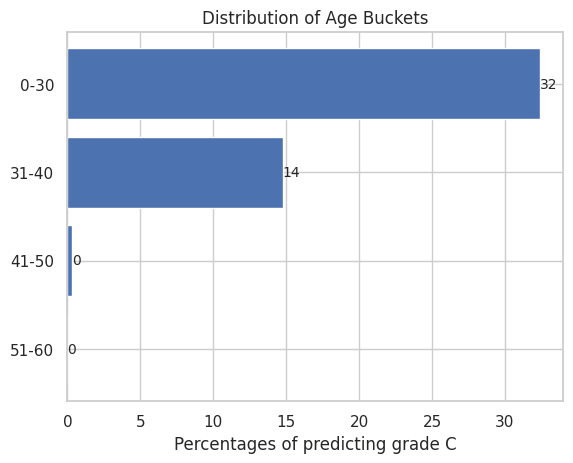

In [ ]:
bars=plt.barh(emp_age['Age_Bucket'], emp_age['Percentages with grade C'])
plt.xlabel('Percentages of predicting grade C')
plt.title('Distribution of Age Buckets')
plt.gca().invert_yaxis()
for bar, count in zip(bars, emp_age['Percentages with grade C']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(count), ha='left', va='center', fontsize=10)
plt.show()

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Nationwide/Untitled0.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Nationwide/Untitled0.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 1896660 bytes to /content/drive/MyDrive/Nationwide/Untitled0.html
